In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')


In [4]:
!pip install opencv-python

In [16]:
import cv2
print(cv2.__version__)

4.12.0


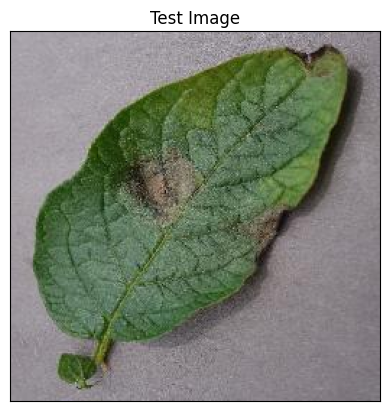

In [33]:
#Test Image Visualization
import cv2
# image_path = 'test/test/AppleCedarRust1.JPG'
# image_path='test/test/TomatoEarlyBlight3.JPG'
# image_path='test/test/PotatoEarlyBlight1.JPG'
image_path='train/Potato___Late_blight/006cc01a-1888-4326-9b62-a65cb55a6377___RS_LB 5207.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [35]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [37]:
print(predictions)


[[4.0102865e-11 6.2985505e-13 6.8487425e-14 2.3012143e-11 9.9170414e-14
  2.8890197e-14 4.5903146e-15 6.0852110e-13 9.7884823e-18 6.2346054e-13
  1.0793202e-16 9.7013658e-14 2.3928971e-12 6.6660396e-15 4.9378188e-15
  4.0913318e-15 3.2381724e-14 3.9314277e-16 7.6716154e-11 1.8382301e-14
  2.1276536e-08 9.9999988e-01 6.4721291e-09 1.2885309e-13 2.9134150e-12
  8.8392667e-13 7.6403800e-11 2.5685639e-13 2.1936217e-13 1.2177400e-11
  1.4952100e-07 1.8631579e-14 1.1699929e-11 4.2490408e-15 2.7296587e-12
  1.0592169e-14 3.6387651e-16 5.4864913e-16]]


In [39]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)


21


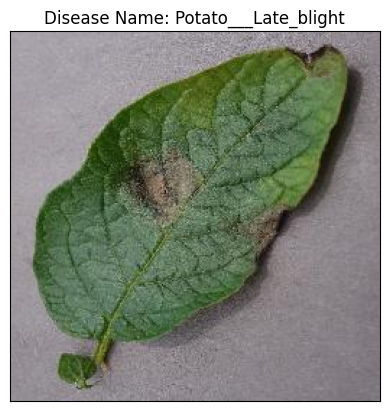

In [41]:

# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()